In [1]:
import numpy as np
import astropy.units as u
import time
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
import poppy
import skimage
from skimage.registration import phase_cross_correlation
import copy
from importlib import reload
import matplotlib.pyplot as plt


import magpyx
from magpyx.utils import ImageStream
import purepyindi
from purepyindi import INDIClient
client0 = purepyindi.INDIClient('localhost', 7624)
client0.start()

from math_module import xp, xcipy, np_array
import utils
import fsm_utils
import cam_utils
from imshows import imshow1, imshow2, imshow3
from matplotlib.patches import Circle

wavelength = 633e-9
fl = 450e-3
fsm_pupil_diam = 7.1e-3
as_per_lamD = (wavelength/fsm_pupil_diam*u.radian).to(u.arcsec)
print(as_per_lamD)

pxscl_lamD = 3.45e-6 / (fl * wavelength/fsm_pupil_diam)
print(1/pxscl_lamD)

thresh = 0.1



/opt/conda/envs/km310gpu/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


18.389524275269295 arcsec
11.62890385793019


# FSM OFF, no enclosure

### Short time series

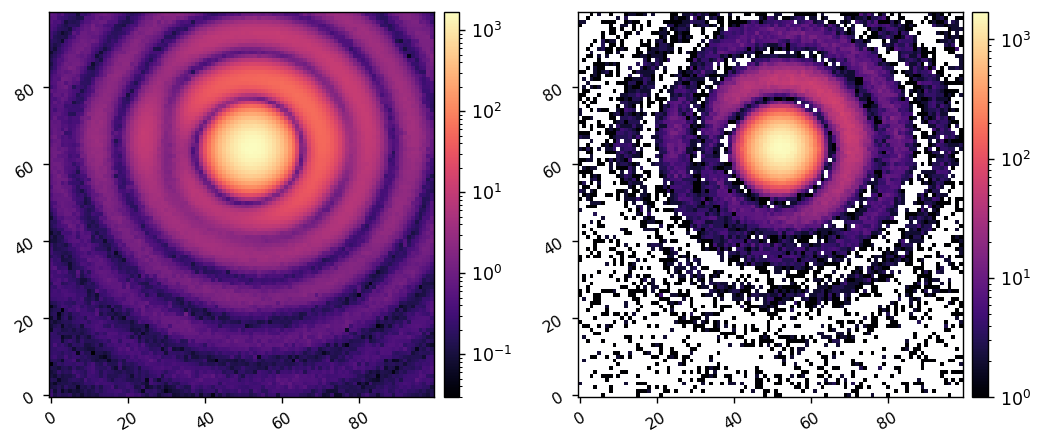

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 6227                                                  
EXPTIME = 9.99999974737875E-05                                                  
FPS     =     1245.32995605469                                                  

In [2]:
date = 20241016
data, hdr = utils.load_fits(f'data/drift/{date}_short_drift_data_fsm_off.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)
hdr

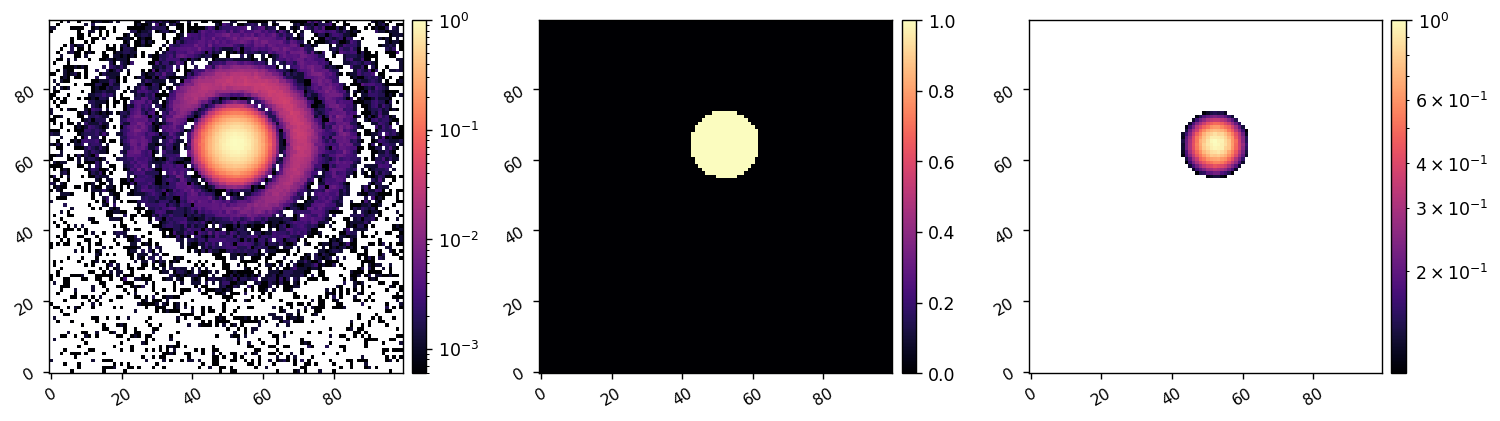

In [30]:
# shift_pix = []
# for i in range(Nshort):
#     shift, _, _ = phase_cross_correlation(short_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

0.015866289219947663 0.018306573268735356


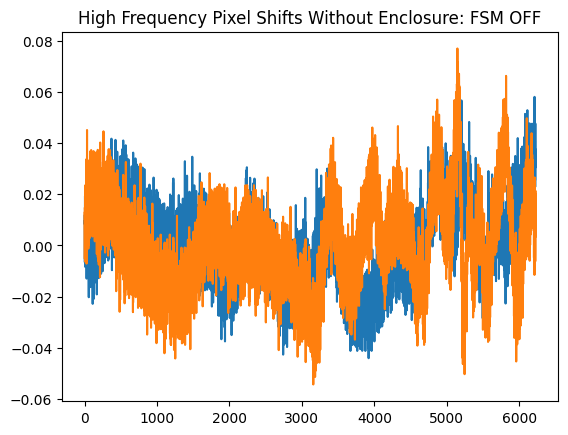

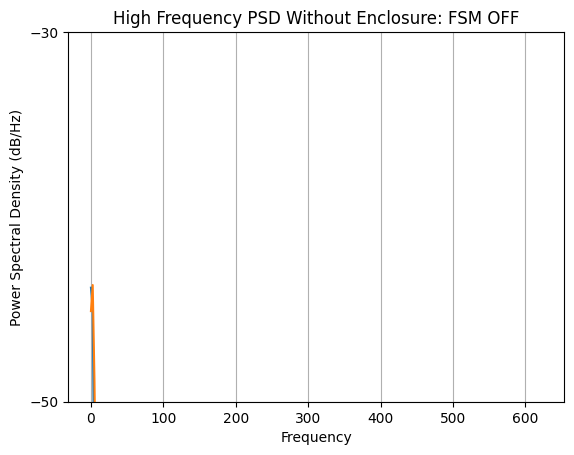

In [31]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('High Frequency Pixel Shifts Without Enclosure: FSM OFF')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('High Frequency PSD Without Enclosure: FSM OFF')
plt.ylim([-50, -30])
plt.yticks([-50, -30])
plt.show()


### Long time series

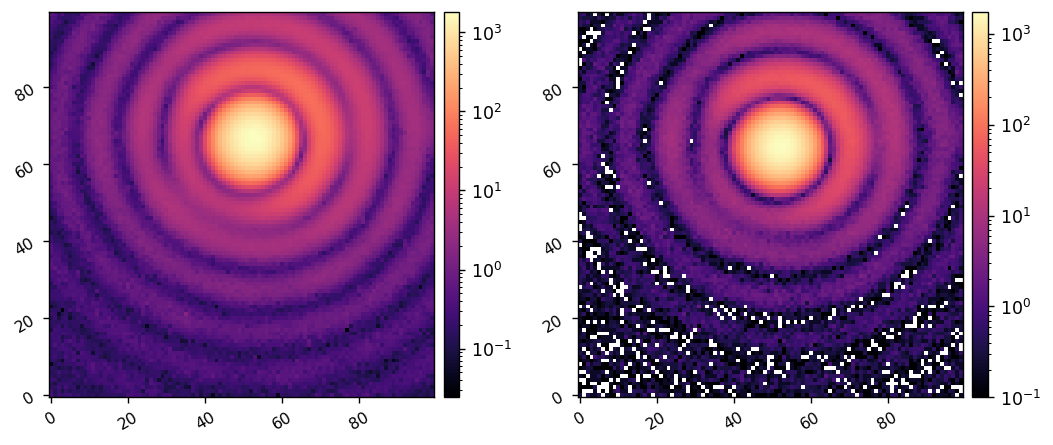

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 8653                                                  
FREQ    =                  5.0                                                  
EXPTIME = 9.99999974737875E-05                                                  
NEXPS   =                  100                                                  
FPS     =     1245.32995605469                                                  
T_TOTAL =               1800.0                                                  

In [32]:
date = 20241016
data, hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_off.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)
hdr

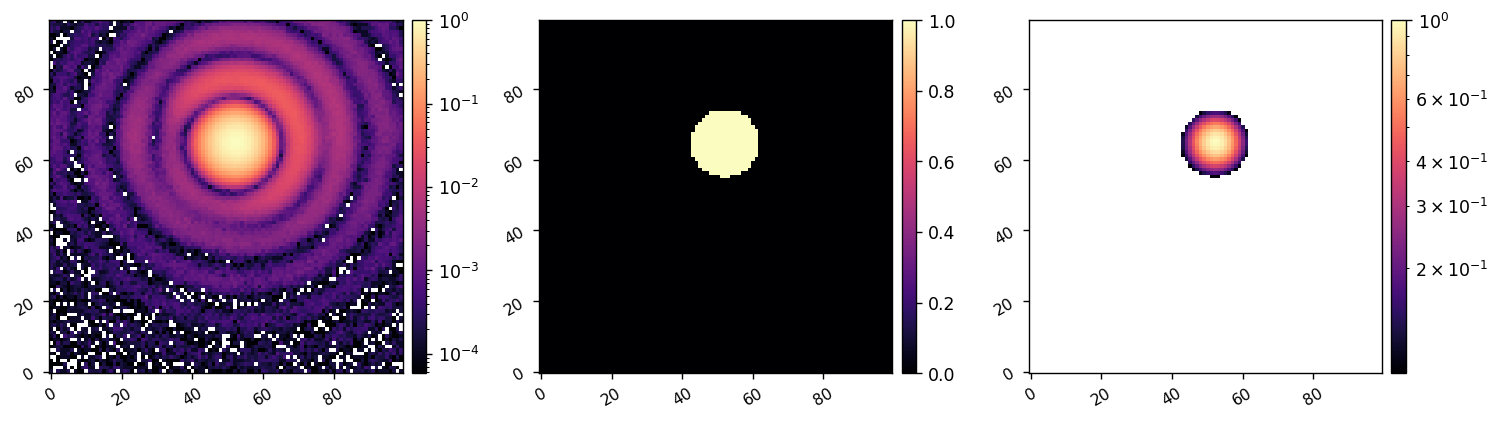

In [33]:
# shift_pix = []
# for i in range(Nlong):
#     shift, _, _ = phase_cross_correlation(long_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])


0.279705125774123 0.853754711782845


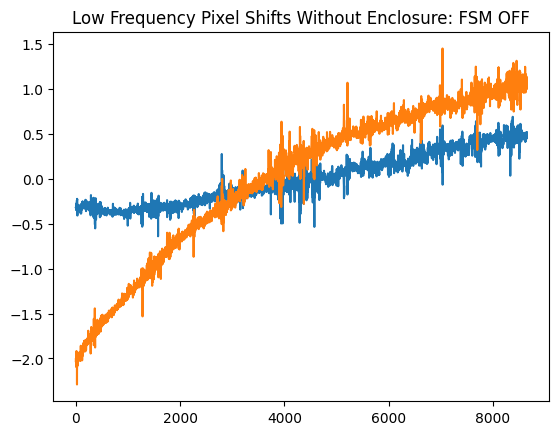

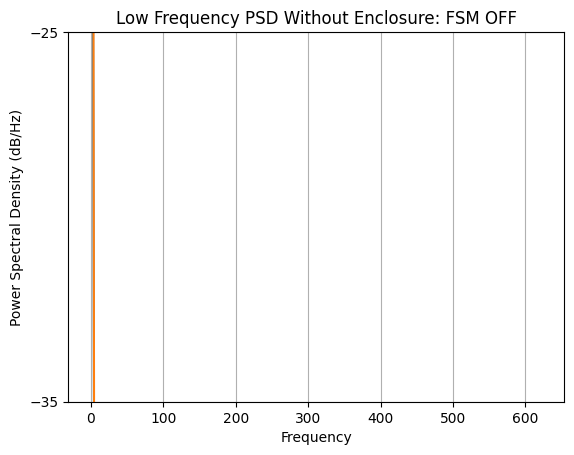

In [34]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('Low Frequency Pixel Shifts Without Enclosure: FSM OFF')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('Low Frequency PSD Without Enclosure: FSM OFF')
plt.ylim([-35, -25])
plt.show()

# FSM OFF, with enclosure

### Short time series

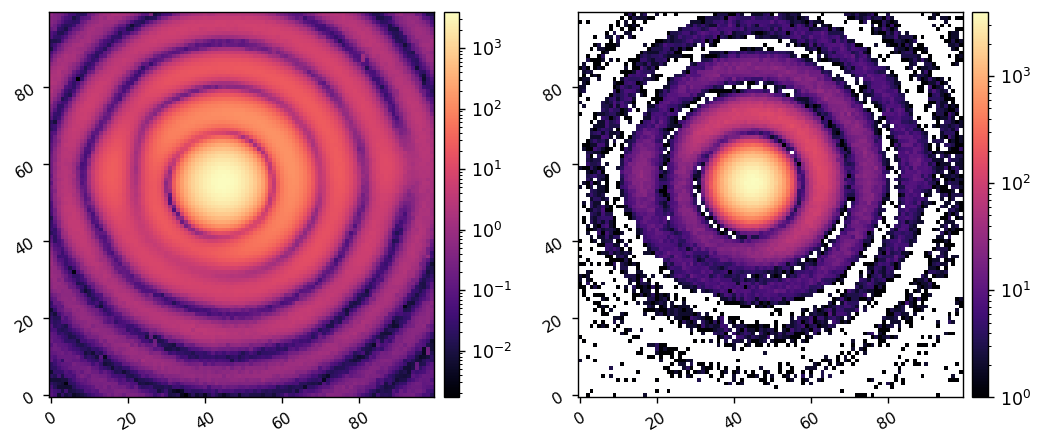

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                12454                                                  
EXPTIME = 9.99999974737875E-05                                                  
FPS     =     1245.32995605469                                                  
T_TOTAL =                 10.0                                                  

In [14]:
date = 20241115
date = 20241119
data, hdr = utils.load_fits(f'data/drift/{date}_short_drift_data_fsm_off.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)
hdr

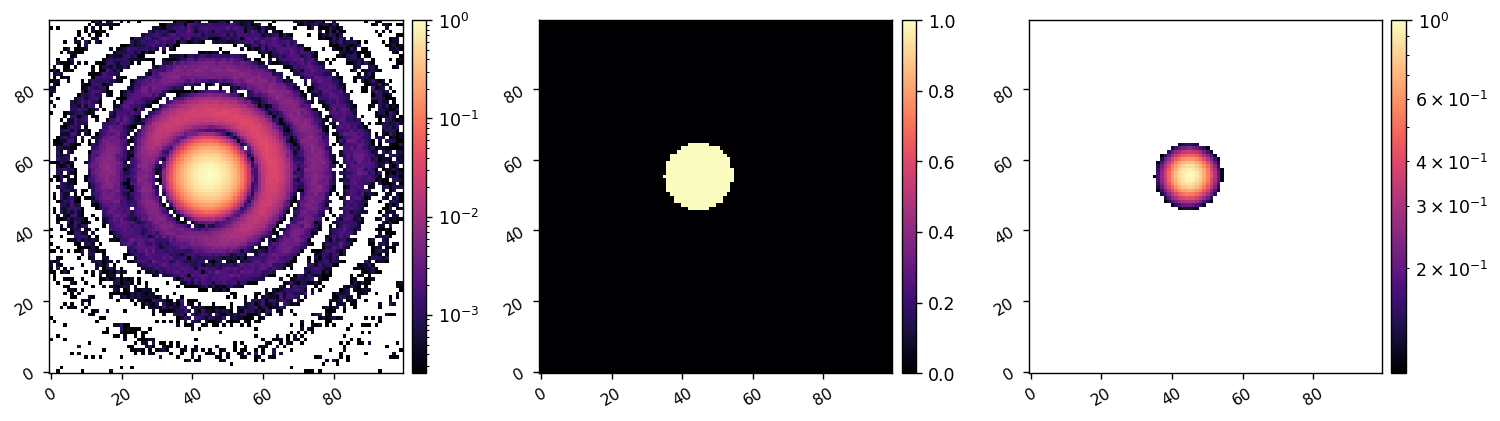

In [15]:
# shift_pix = []
# for i in range(Nshort):
#     shift, _, _ = phase_cross_correlation(short_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

0.010987621893398586 0.0082365544411309


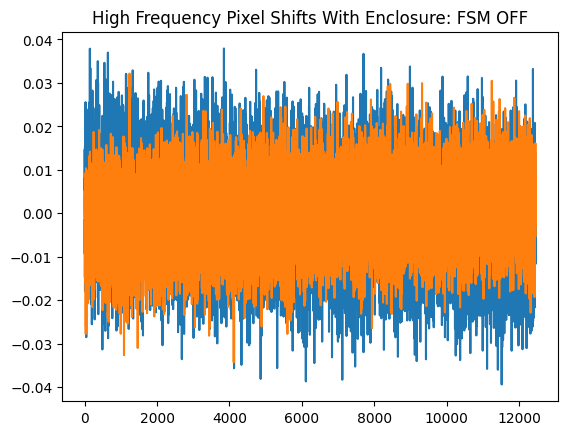

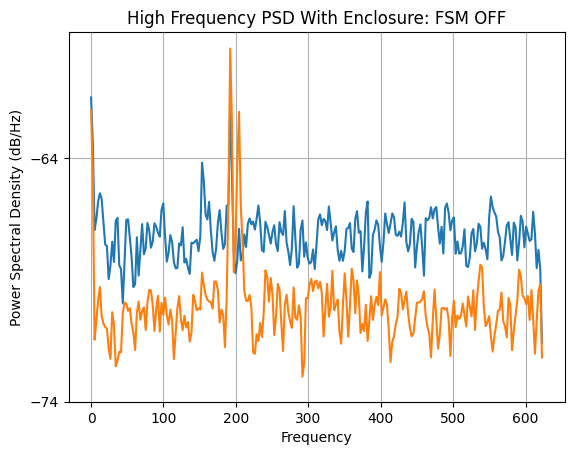

In [16]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('High Frequency Pixel Shifts With Enclosure: FSM OFF')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('High Frequency PSD With Enclosure: FSM OFF')
# plt.ylim([-50, -30])
# plt.yticks([-50, -30])
plt.show()


0.011365229927370778 0.01310437804910366


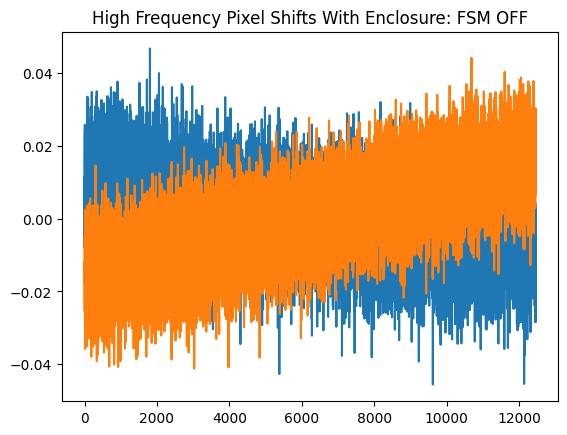

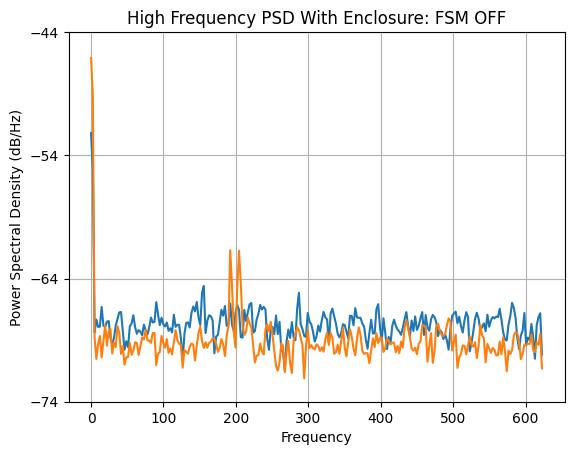

In [7]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('High Frequency Pixel Shifts With Enclosure: FSM OFF')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('High Frequency PSD With Enclosure: FSM OFF')
# plt.ylim([-50, -30])
# plt.yticks([-50, -30])
plt.show()


### Long time series.

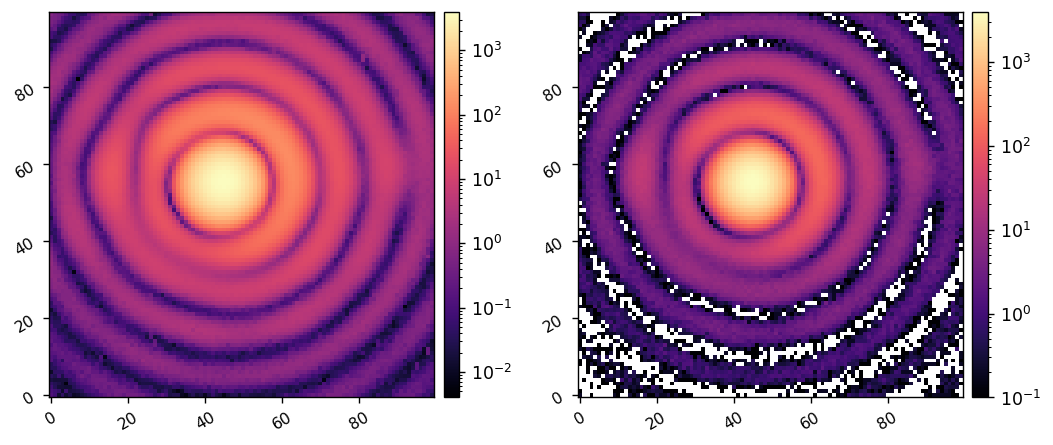

In [19]:
date = 20241115
date = 20241119
data, hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_off_2.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)

times = np.linspace(0, hdr['T_TOTAL'], data.shape[0])

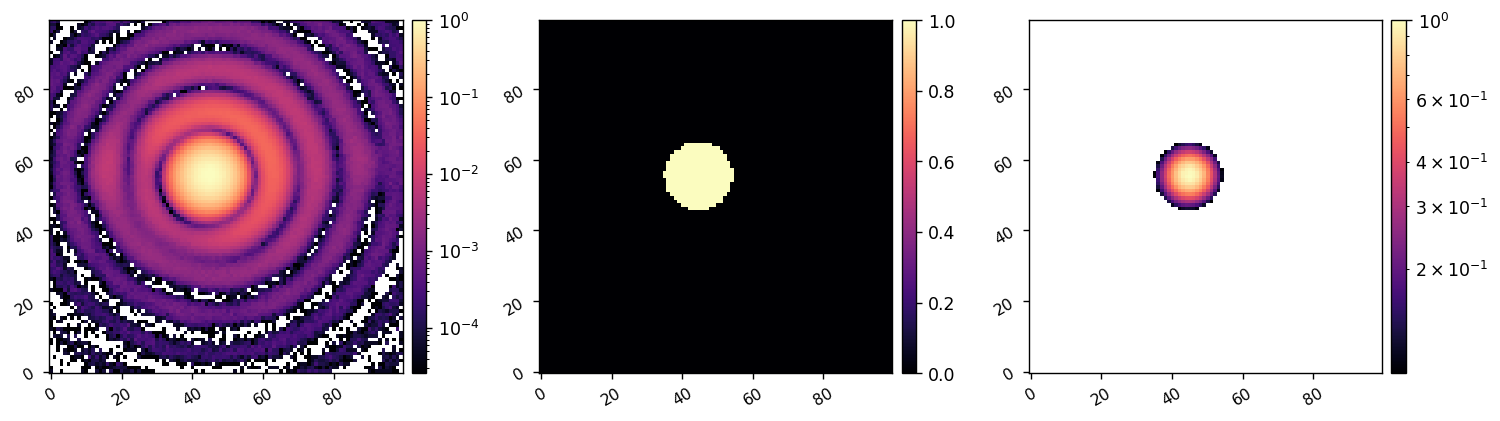

In [20]:
# shift_pix = []
# for i in range(Nlong):
#     shift, _, _ = phase_cross_correlation(long_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

0.026051311891056333 0.012619872048065027


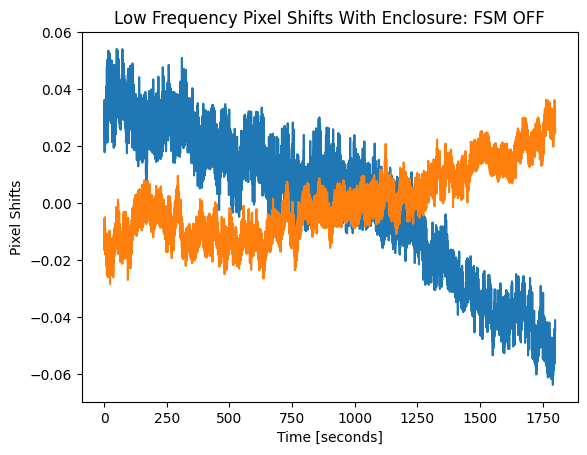

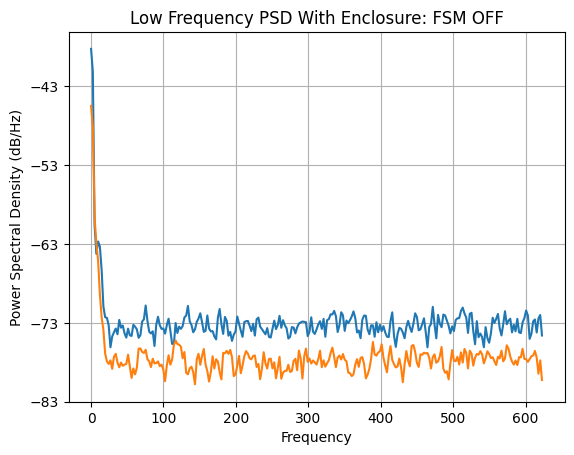

In [21]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(times, shift_pix[:,0])
plt.plot(times, shift_pix[:,1])
plt.title('Low Frequency Pixel Shifts With Enclosure: FSM OFF')
plt.ylabel('Pixel Shifts')
plt.xlabel('Time [seconds]')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('Low Frequency PSD With Enclosure: FSM OFF')
# plt.ylim([-35, -25])
# plt.yticks([-35, -25])
plt.show()

0.36189427125212364 0.5983219263399132


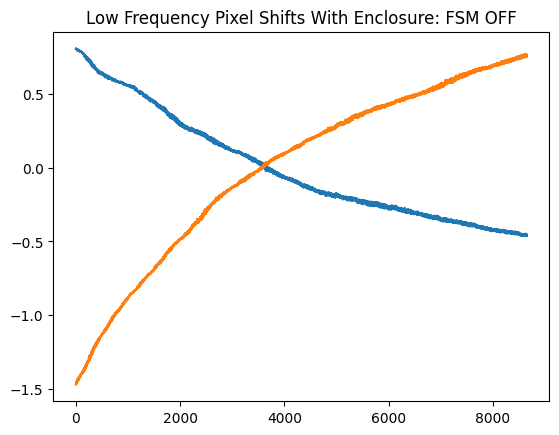

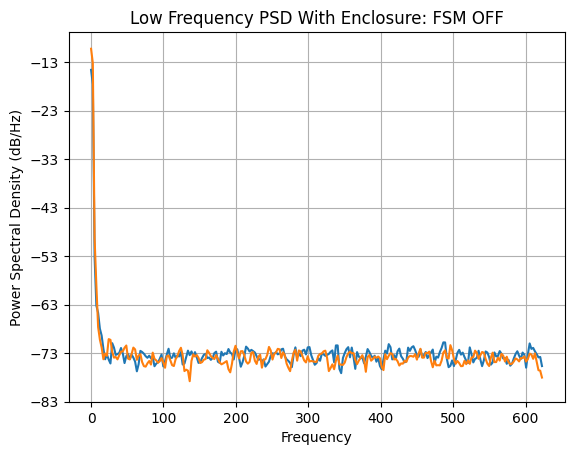

In [20]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('Low Frequency Pixel Shifts With Enclosure: FSM OFF')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('Low Frequency PSD With Enclosure: FSM OFF')
# plt.ylim([-35, -25])
# plt.yticks([-35, -25])
plt.show()


# FSM ON, no enclosure

### Short time series

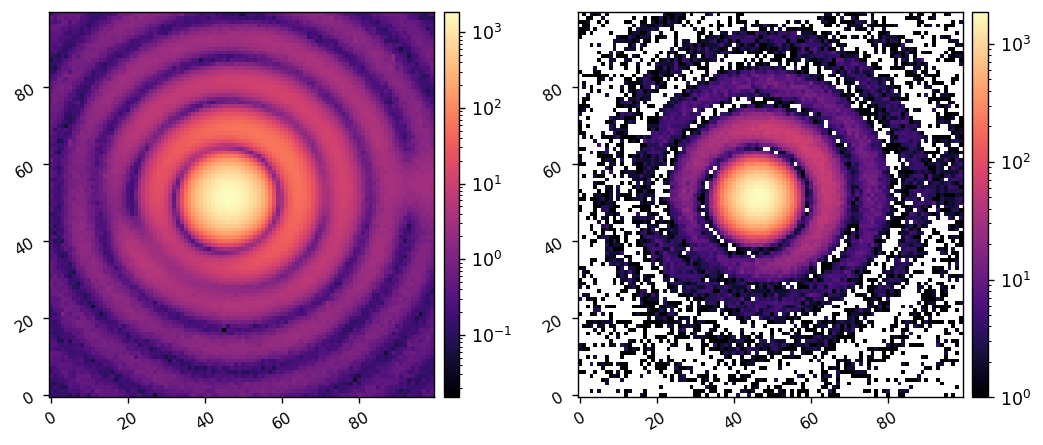

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 6227                                                  
EXPTIME = 9.99999974737875E-05                                                  
FPS     =     1245.32995605469                                                  
T_TOTAL =                  5.0                                                  

In [21]:
date = 20241021
data, hdr = utils.load_fits(f'data/drift/{date}_short_drift_data_fsm_on.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)
hdr

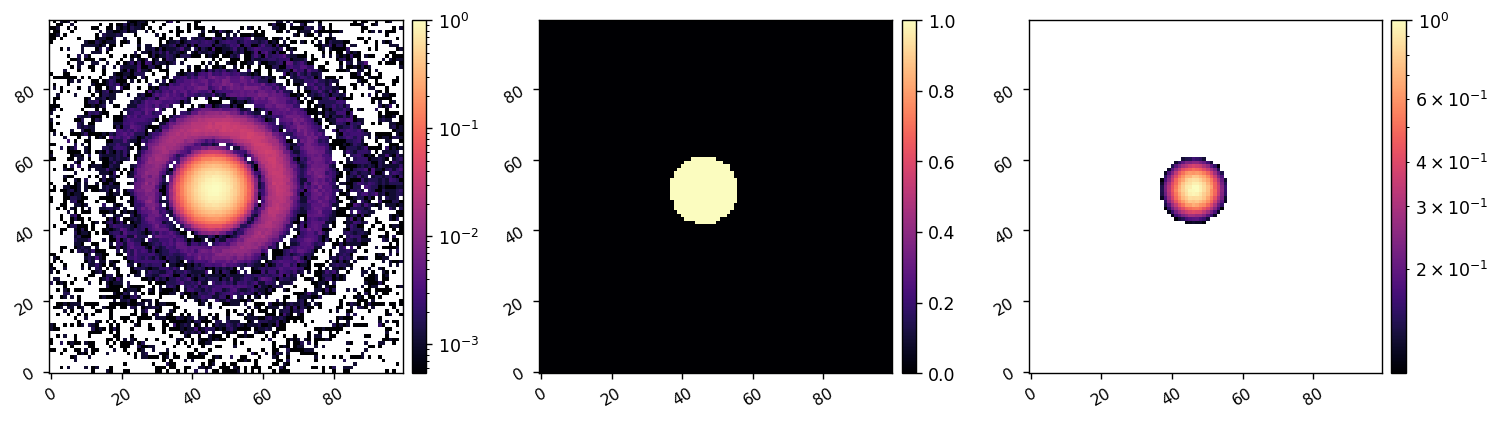

In [22]:
# shift_pix = []
# for i in range(Nshort):
#     shift, _, _ = phase_cross_correlation(short_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

0.046631201280541185 0.03754330602392757


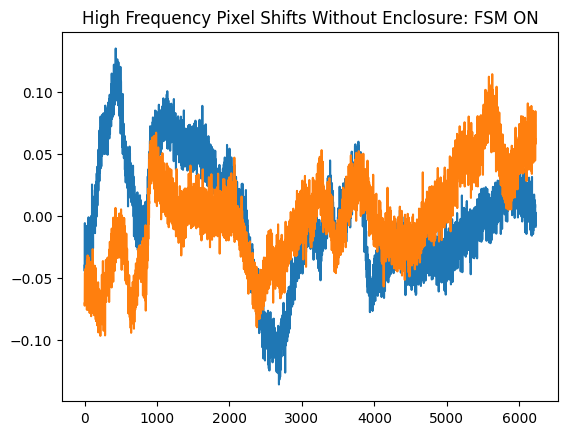

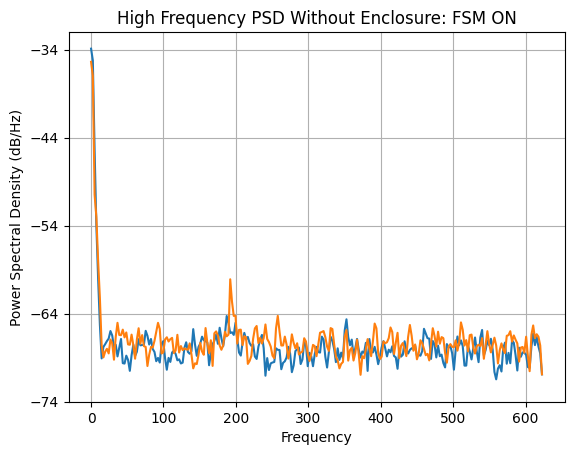

In [24]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('High Frequency Pixel Shifts Without Enclosure: FSM ON')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('High Frequency PSD Without Enclosure: FSM ON')
# plt.ylim([-50, -30])
# plt.yticks([-50, -30])
plt.show()


### Long time series

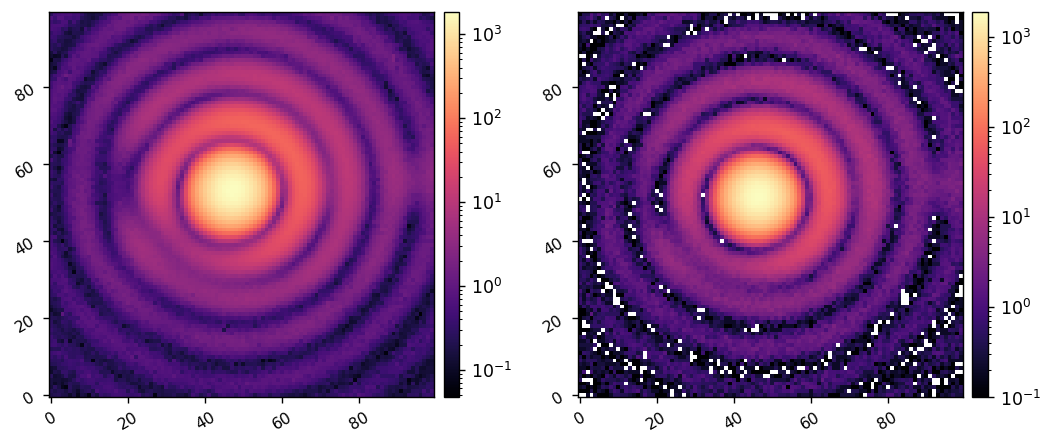

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 8653                                                  
FREQ    =                  5.0                                                  
EXPTIME = 9.99999974737875E-05                                                  
NEXPS   =                  100                                                  
FPS     =     1245.32995605469                                                  
T_TOTAL =               1800.0                                                  

In [25]:
date = 20241021
data, hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_on.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)
hdr

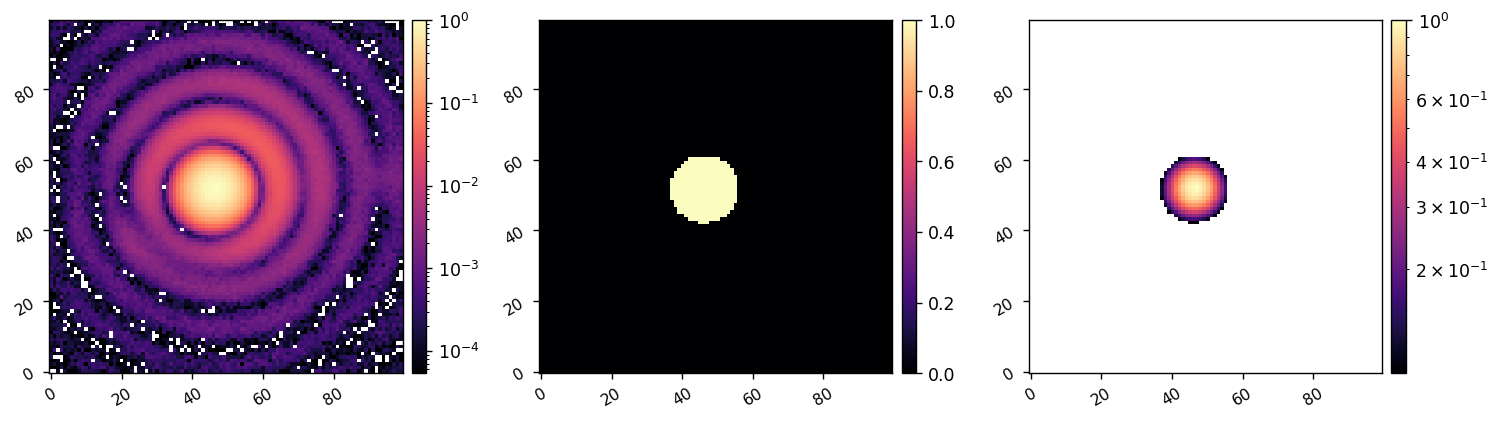

In [26]:
# shift_pix = []
# for i in range(Nlong):
#     shift, _, _ = phase_cross_correlation(long_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])


0.511670201380682 0.834110964384011


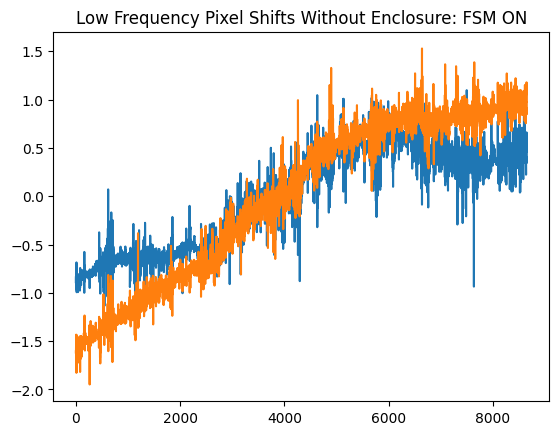

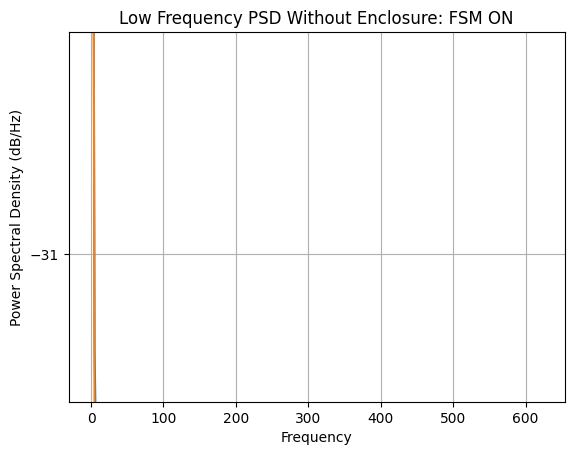

In [27]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('Low Frequency Pixel Shifts Without Enclosure: FSM ON')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('Low Frequency PSD Without Enclosure: FSM ON')
plt.ylim([-35, -25])
plt.show()

# FSM ON, with enclosure

### Short time series

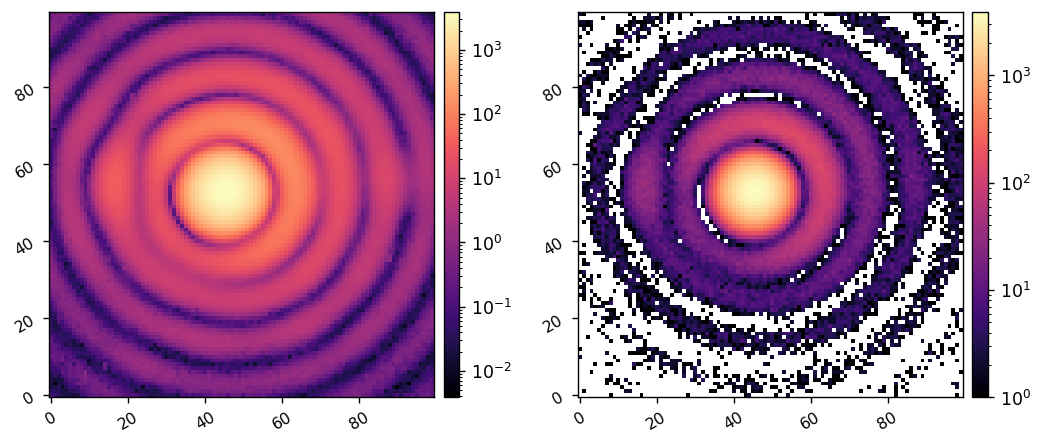

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                12454                                                  
EXPTIME = 9.99999974737875E-05                                                  
FPS     =     1245.32995605469                                                  
T_TOTAL =                 10.0                                                  

In [7]:
date = 20241118
date = 20241119
data, hdr = utils.load_fits(f'data/drift/{date}_short_drift_data_fsm_on.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)
hdr

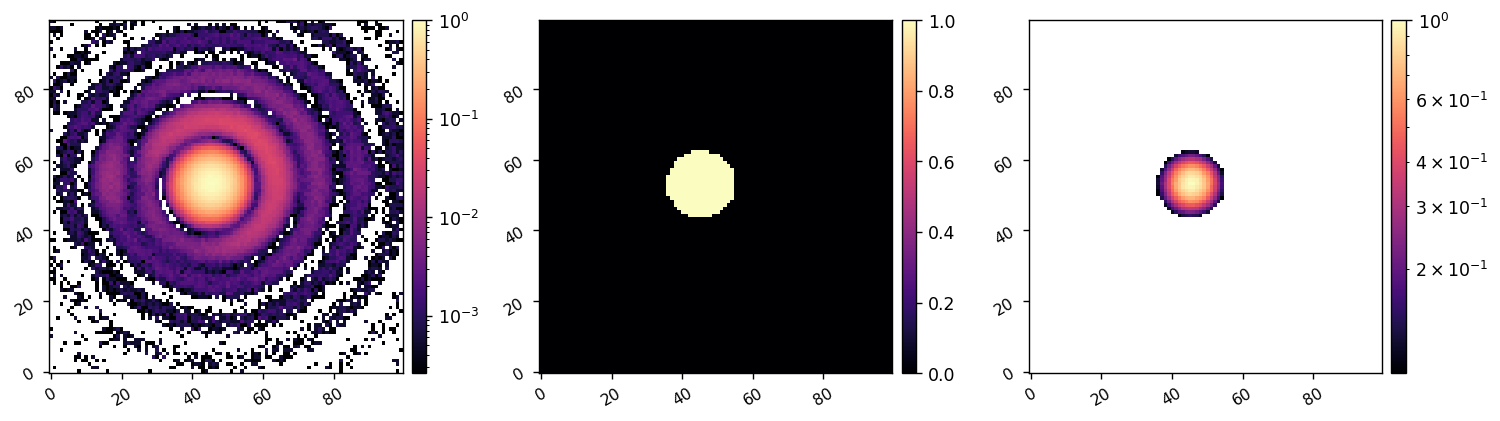

In [4]:
# shift_pix = []
# for i in range(Nshort):
#     shift, _, _ = phase_cross_correlation(short_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

0.010912907733287127 0.016851467364369075


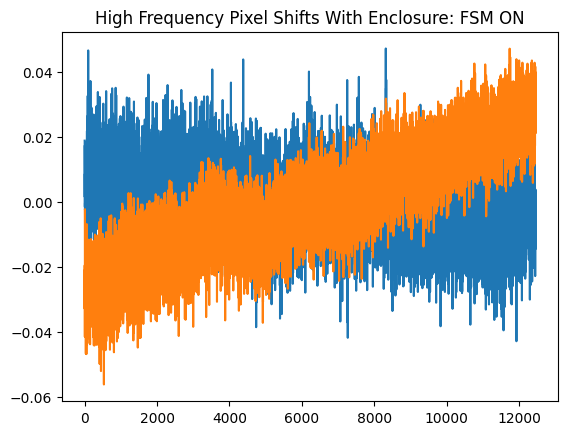

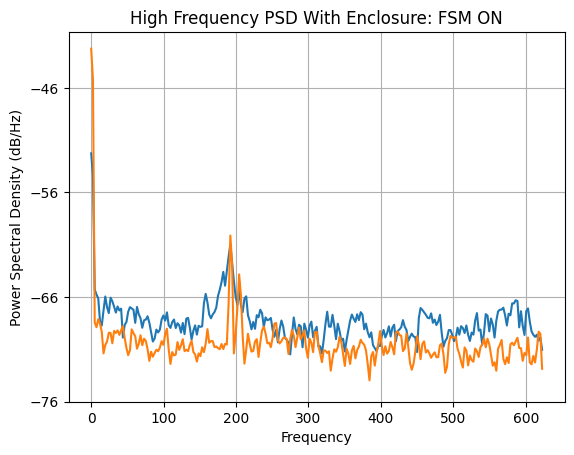

In [8]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.title('High Frequency Pixel Shifts With Enclosure: FSM ON')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('High Frequency PSD With Enclosure: FSM ON')
# plt.ylim([-50, -30])
# plt.yticks([-50, -30])
plt.show()


### Long time series.

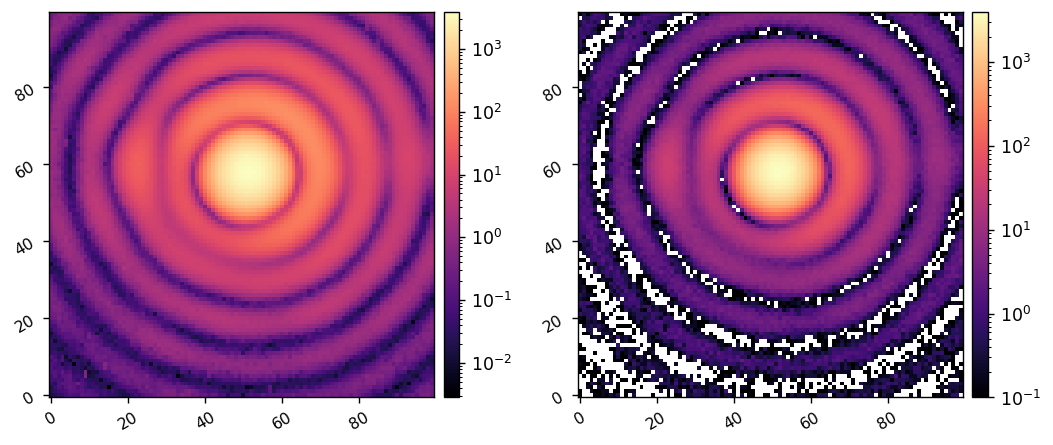

In [26]:
# date = 20241118
# data, hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_on.fits', header=True)
date = 20241119
data, hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_on_2.fits', header=True)
data = np_array(data)

Nshort = hdr['NAXIS3']
fps = hdr['FPS']
mean_frame = np.mean(data, axis=0)
imshow2(mean_frame, data[0], lognorm=True)

times = np.linspace(0, hdr['T_TOTAL'], data.shape[0])


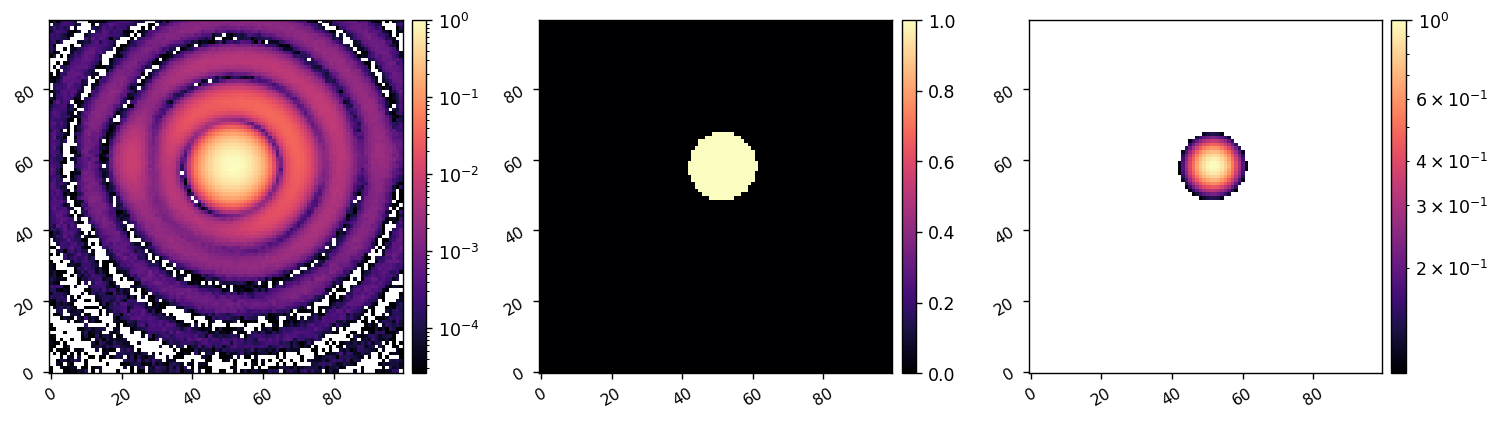

In [27]:
# shift_pix = []
# for i in range(Nlong):
#     shift, _, _ = phase_cross_correlation(long_data[i], mean_frame, upsample_factor=100)
#     shift_pix.append(shift)
# shift_pix = np.array(shift_pix)

shift_pix = []
cen_0 = utils.centroid(data[0].astype(float), thresh=thresh, plot=True)
for i in range(Nshort):
    cen = utils.centroid(data[i].astype(float), thresh=thresh, plot=0)
    shift = cen - cen_0
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

0.3822070709976415 0.18026464063277925


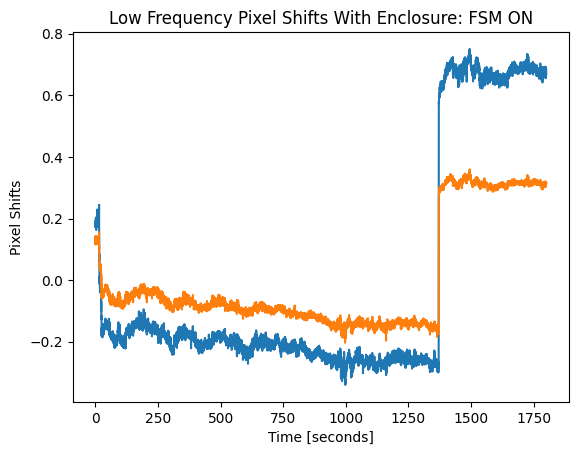

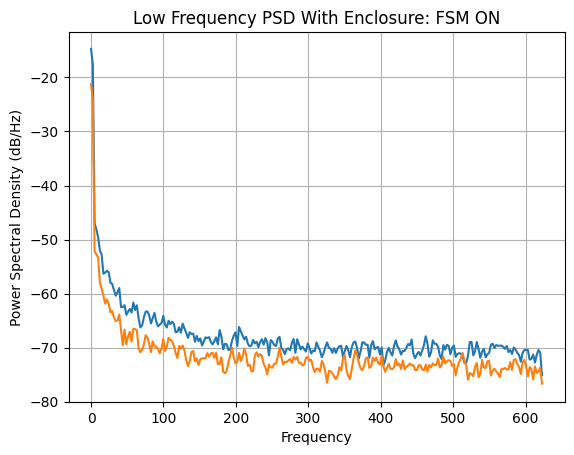

In [28]:
print(np.sqrt(np.mean(np.square(shift_pix[:, 0]))), np.sqrt(np.mean(np.square(shift_pix[:, 1]))))

plt.plot(times, shift_pix[:,0])
plt.plot(times, shift_pix[:,1])
plt.title('Low Frequency Pixel Shifts With Enclosure: FSM ON')
plt.ylabel('Pixel Shifts')
plt.xlabel('Time [seconds]')
plt.show()

py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=512)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=512)
plt.title('Low Frequency PSD With Enclosure: FSM ON')
# plt.ylim([-35, -25])
# plt.yticks([-35, -25])
plt.show()